<a href="https://colab.research.google.com/github/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/blob/main/Multiple_Linear_Regression_Group_Project_car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Plan**

Load data

Split dataset into training and test dataset, use training dataset to create the model.

Display sample data and summary


Calculate normality p-value

Calculate lineral regression model and display values

Display regression summary

Display scatterplot again with calculated regression line

Compare actual and predicted values to determine accuracy of the linear regression equation

Observe residuals data in graphical form to draw conclusions


Normality in Mulitiple Linear Regression
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/normality/


In [2]:
#Read this csv file from GitHub into Jupyter Notebook.
dataset = pd.read_csv(r"https://raw.githubusercontent.com/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/main/CarPrice_Assignment.csv")

In [3]:
#Make a copy and populate with training data
datasettraining = dataset.copy()
datasettest = dataset.copy()

#Take a random sample of 75% of the data for training (and put them into order and renumber to eliminate missing index values)
datasettraining = datasettraining.sample(frac = .75).sort_index().reset_index(drop=True)

#Get remaining 25% of data rows from dataset (remove all rows from dataset that aren't already in datasettraining)
datasettest = (pd.merge(dataset, datasettraining, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)).sort_index().reset_index(drop=True)

In [4]:
#Check training data head
datasettraining.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Summary of all fields
datasettraining.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,102.402597,0.746753,98.914286,174.198701,65.950000,53.722078,2561.603896,126.915584,3.341234,3.246104,10.169481,103.538961,5113.311688,24.974026,30.603896,13227.712123
std,59.020382,1.244920,6.166369,12.236301,2.161857,2.585334,515.849707,42.778492,0.267165,0.296251,3.949143,39.714526,476.576922,5.980303,6.358997,7826.679794
min,1.000000,-2.000000,86.600000,144.600000,61.800000,47.800000,1819.000000,70.000000,2.680000,2.190000,7.000000,52.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.500000,0.000000,94.500000,166.300000,64.100000,51.700000,2151.000000,98.000000,3.150000,3.110000,8.700000,70.000000,4800.000000,19.000000,25.000000,7815.500000
50%,102.500000,1.000000,96.950000,173.200000,65.500000,54.100000,2417.000000,115.000000,3.330000,3.270000,9.000000,94.500000,5200.000000,24.000000,30.000000,10320.000000
75%,153.500000,2.000000,102.300000,181.200000,66.900000,55.500000,2918.750000,141.000000,3.580000,3.407500,9.400000,116.000000,5500.000000,30.000000,34.000000,16512.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6000.000000,38.000000,47.000000,45400.000000


In [6]:
#Summary of all fields
datasettest.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,104.803922,1.098039,98.280392,173.598039,65.780392,53.733333,2537.333333,126.882353,3.295098,3.283529,10.061176,105.862745,5160.784314,25.960784,31.196078,13424.666667
std,60.782899,1.220736,5.593425,12.750302,2.110073,1.976832,539.814734,38.410752,0.281513,0.362777,4.079052,39.364461,481.177070,8.027355,8.335513,8539.139244
min,6.000000,-2.000000,86.600000,141.100000,60.300000,50.200000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,19.000000,5151.000000
25%,52.000000,0.000000,94.500000,167.050000,64.100000,52.300000,2109.500000,97.000000,3.050000,3.150000,8.500000,68.500000,4800.000000,19.000000,24.000000,7597.000000
50%,112.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2385.000000,120.000000,3.270000,3.350000,9.000000,100.000000,5100.000000,24.000000,30.000000,9995.000000
75%,159.500000,2.000000,102.050000,185.050000,66.500000,55.550000,2955.000000,149.000000,3.590000,3.435000,9.400000,131.500000,5500.000000,31.000000,37.000000,15991.500000
max,200.000000,3.000000,113.000000,199.600000,71.400000,57.500000,4066.000000,258.000000,3.780000,4.170000,23.000000,207.000000,6600.000000,49.000000,54.000000,41315.000000


In [7]:
#Set Variable Choices
MultiVarChoices = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

response = 'price'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':


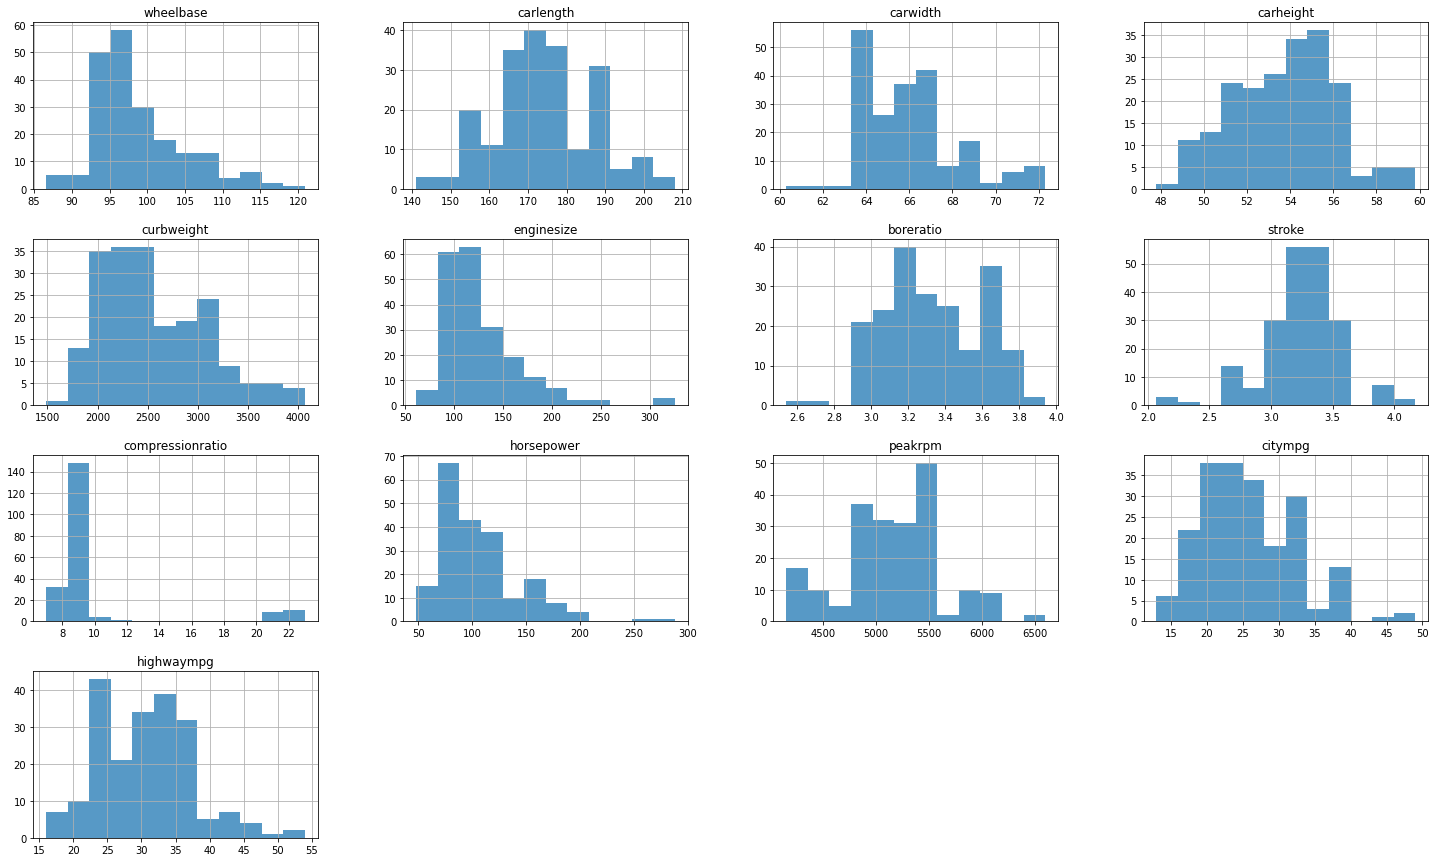

In [8]:
#getonly fields included in model
plots = dataset[MultiVarChoices]

#Display histograms for fields in model
#Set size of histogram
f, ax = plt.subplots(1, 1, figsize = (25, 15))

#Display histograms
_ = plots.hist(bins=12, alpha=0.75, ax=ax)

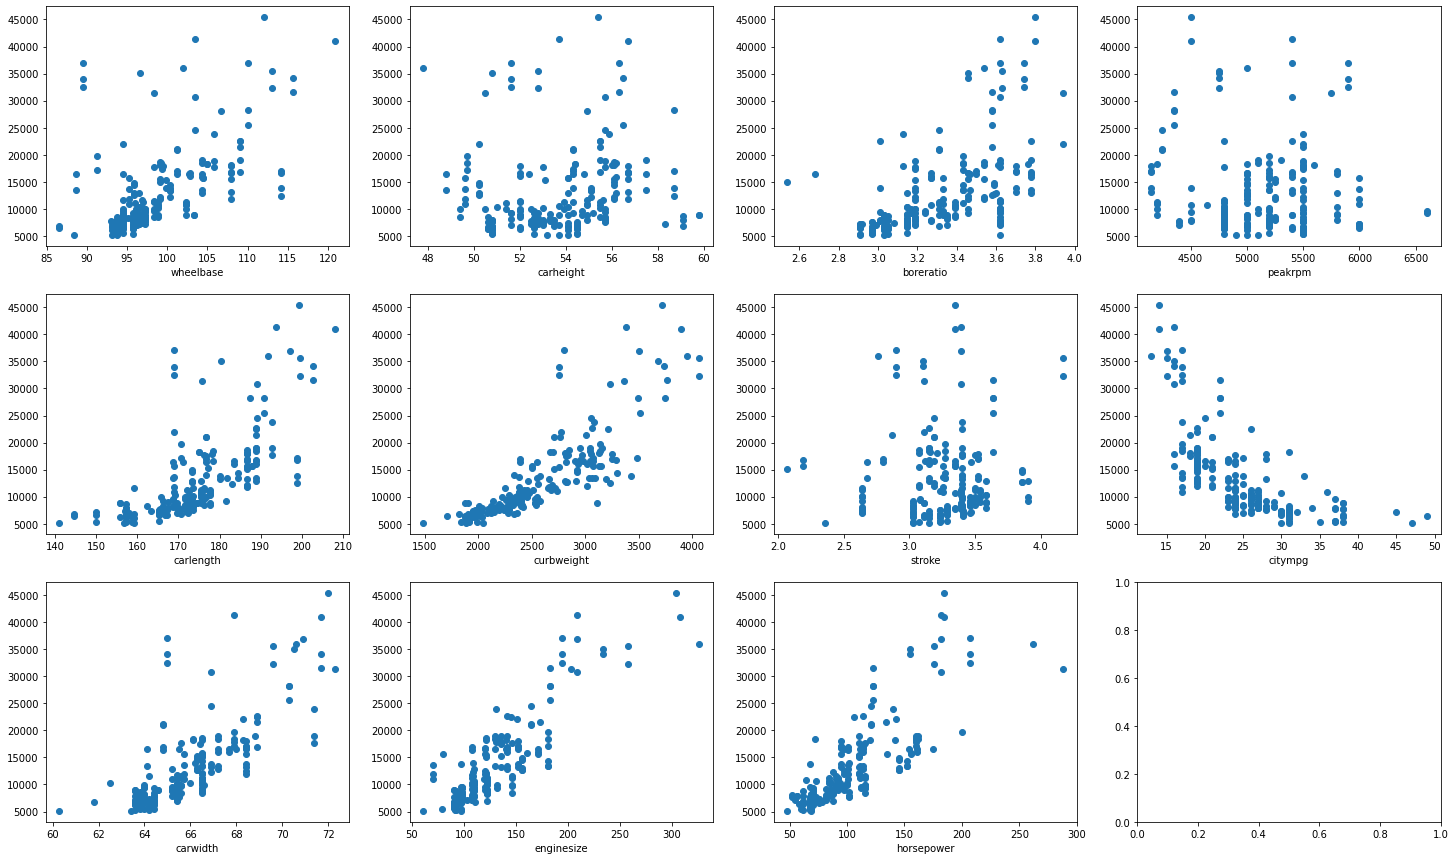

In [9]:
#Remove compression ratio from consideration as an explanatory variables 
while 'compressionratio' in MultiVarChoices: MultiVarChoices.remove('compressionratio')

#Scatterplot
f, ax = plt.subplots(3, 4, figsize = (25, 15))

for i in range(0, len(MultiVarChoices)-1):
  ax[i%3][int(i/3)].scatter(x = dataset[MultiVarChoices[i]], y = dataset[response])
  ax[i%3][int(i/3)].set_xlabel(MultiVarChoices[i])

plt.show()

In [10]:
"""
import numpy as np
dataset[MultiVarChoices[1]] = np.log(dataset[MultiVarChoices[1]])
datasetX = pd.DataFrame(np.log(dataset[MultiVarChoices[0]]))
for i in range(1, len(MultiVarChoices)-1):
  datasetX = datasetX.join(np.cbrt(dataset[MultiVarChoices[i]]))

#Scatterplot
f, ax = plt.subplots(3, 4, figsize = (25, 15))

for i in range(0, len(MultiVarChoices)-1):
  ax[i%3][int(i/3)].scatter(x = datasetX[MultiVarChoices[i]], y = dataset[response])
  ax[i%3][int(i/3)].set_xlabel(MultiVarChoices[i])

plt.show()
"""

'\nimport numpy as np\ndataset[MultiVarChoices[1]] = np.log(dataset[MultiVarChoices[1]])\ndatasetX = pd.DataFrame(np.log(dataset[MultiVarChoices[0]]))\nfor i in range(1, len(MultiVarChoices)-1):\n  datasetX = datasetX.join(np.cbrt(dataset[MultiVarChoices[i]]))\n\n#Scatterplot\nf, ax = plt.subplots(3, 4, figsize = (25, 15))\n\nfor i in range(0, len(MultiVarChoices)-1):\n  ax[i%3][int(i/3)].scatter(x = datasetX[MultiVarChoices[i]], y = dataset[response])\n  ax[i%3][int(i/3)].set_xlabel(MultiVarChoices[i])\n\nplt.show()\n'

In [11]:
#Create Linear Regression object
model = None
model = LinearRegression()

#Check Coefficient of Determination for each variable
for i in range(0, len(MultiVarChoices)-1):
  #Fit the dataset
  pivot = np.array(datasettraining[MultiVarChoices[i]]).reshape(-1,1).tolist()
  model.fit(pivot, datasettraining[response])
  r_sq = model.score(pivot, datasettraining[response])
  print(('Coefficient of Determination for ' + MultiVarChoices[i] + ":").ljust(45), "{:.2%}".format(r_sq))

Coefficient of Determination for wheelbase:   30.63%
Coefficient of Determination for carlength:   44.48%
Coefficient of Determination for carwidth:    59.37%
Coefficient of Determination for carheight:   1.00%
Coefficient of Determination for curbweight:  69.42%
Coefficient of Determination for enginesize:  76.43%
Coefficient of Determination for boreratio:   30.40%
Coefficient of Determination for stroke:      0.19%
Coefficient of Determination for horsepower:  64.44%
Coefficient of Determination for peakrpm:     1.22%
Coefficient of Determination for citympg:     48.89%


In [12]:
#Car Height, Stroke and Peak RPM have so little connection to price that they are probably unrelated. Removing from the list of variables
while 'carheight' in MultiVarChoices: MultiVarChoices.remove('carheight')
while 'stroke' in MultiVarChoices: MultiVarChoices.remove('stroke')
while 'peakrpm' in MultiVarChoices: MultiVarChoices.remove('peakrpm')

#Create Linear Regression object
model = LinearRegression()

#Fit the dataset
model.fit(datasettraining[MultiVarChoices], datasettraining[response])

#Gernate list of predictions from test data
predictions = model.predict(datasettest[MultiVarChoices])  

#Check test data head
datasettest.head() 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
1,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.0
2,13,0,bmw x1,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970.0
3,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
4,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0


In [13]:
#Sample data output
print('Actual'.ljust(14), 'Predicted'.ljust(14))
print(response.ljust(14), response.ljust(14))

for i in [0,1,2,3,4,45,46,47,48,49]:
    print(str(datasettest[response][i]).ljust(14), str(predictions[i]).ljust(14))

Actual         Predicted     
price          price         
15250.0        14829.977345771142
23875.0        19786.020596709983
20970.0        17188.571646645694
41315.0        26096.816750180144
36880.0        28808.379253955813
7995.0         6908.626852643989
9495.0         7540.039827247827
9995.0         10741.026008096065
11595.0        10178.627495230146
15985.0        15688.19867432426


In [14]:
#Check accuracy of model (Coefficient of Determination)
r_sq = model.score(datasettraining[MultiVarChoices], datasettraining[response])
print('Coefficient of Determination:', r_sq)

#Cross validation scores
scores = cross_val_score(model, datasettraining[MultiVarChoices], datasettraining[response], cv=4)
print('Cross validation scores:', scores)


Coefficient of Determination: 0.8299289603843316
Cross validation scores: [0.82194627 0.77037876 0.43278743 0.5661483 ]


In [15]:
#Get the Y-intercept value
salIntercept = model.intercept_

#Get the Coefficents for the formula.
salCoef = model.coef_

#Output formula variables for regression analysis.
print('Intercept:', salIntercept,'\n')

print("Coefficients:")
list(zip(datasettraining[MultiVarChoices], salCoef))

Intercept: -41930.02982290257 

Coefficients:


[('wheelbase', 125.63315020072227),
 ('carlength', -80.66428236932215),
 ('carwidth', 605.2212644155909),
 ('curbweight', 2.4075648003817776),
 ('enginesize', 81.69817925174482),
 ('boreratio', -691.569162104081),
 ('horsepower', 43.58410283275625),
 ('citympg', -135.63770512892933),
 ('highwaympg', 49.58718368531402)]

In [16]:
#Assemble fields for model
mmfields = response + ' ~ ' + ' + '.join(MultiVarChoices)

# fit multi linear regression model
multi_model = ols(mmfields, data=datasettraining).fit()

# display model summary
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     78.08
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           6.43e-51
Time:                        02:48:56   Log-Likelihood:                -1462.3
No. Observations:                 154   AIC:                             2945.
Df Residuals:                     144   BIC:                             2975.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.193e+04   1.48e+04     -2.833      0.0

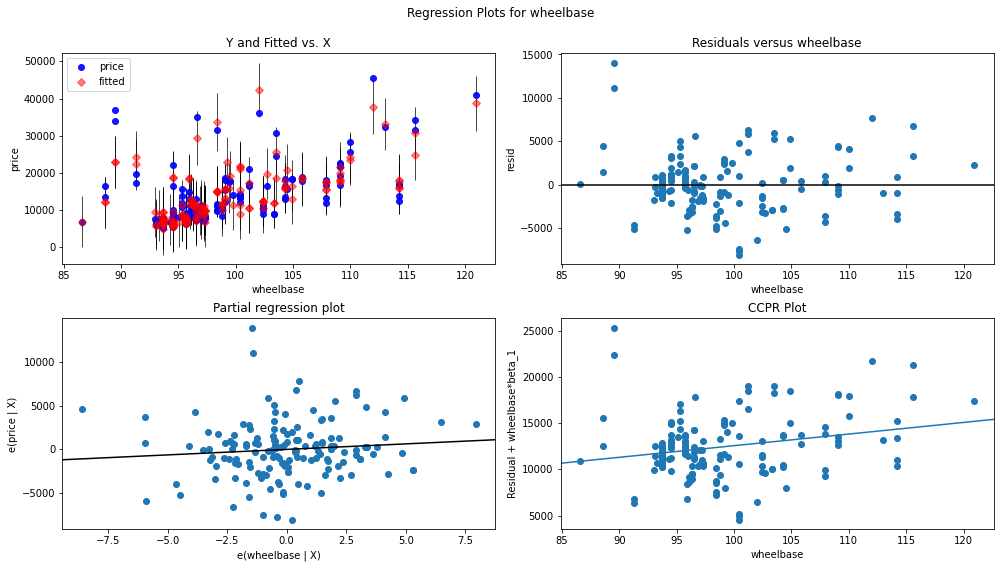

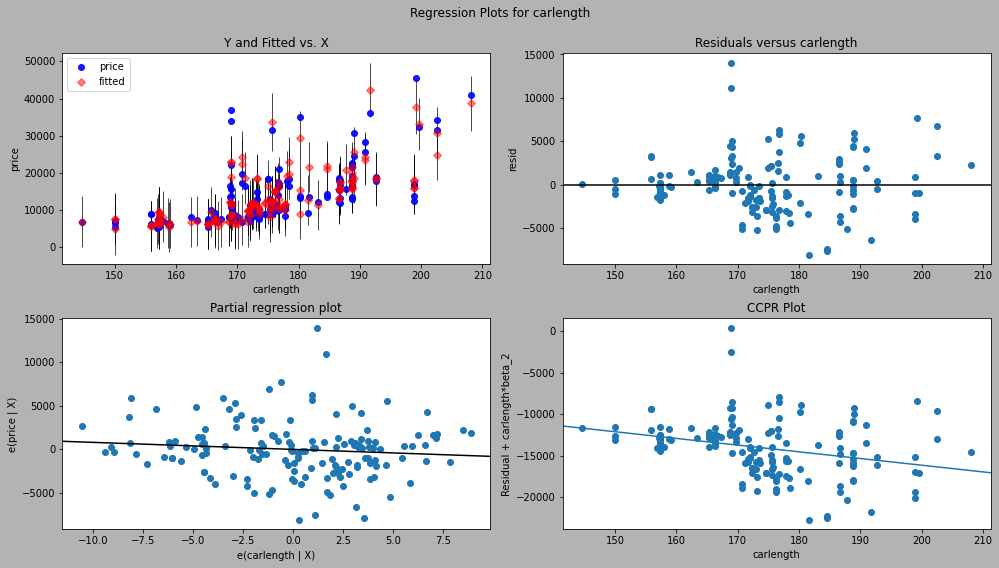

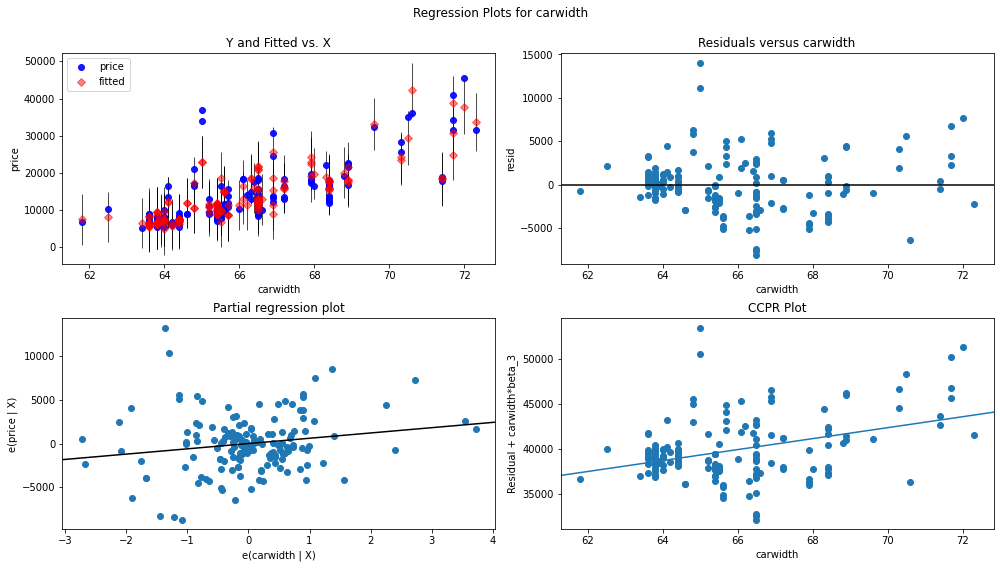

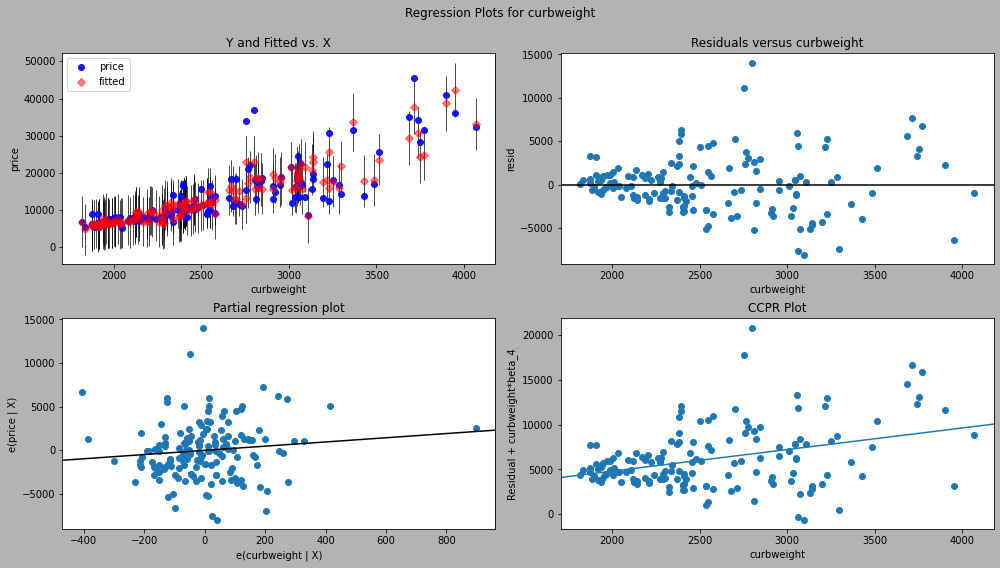

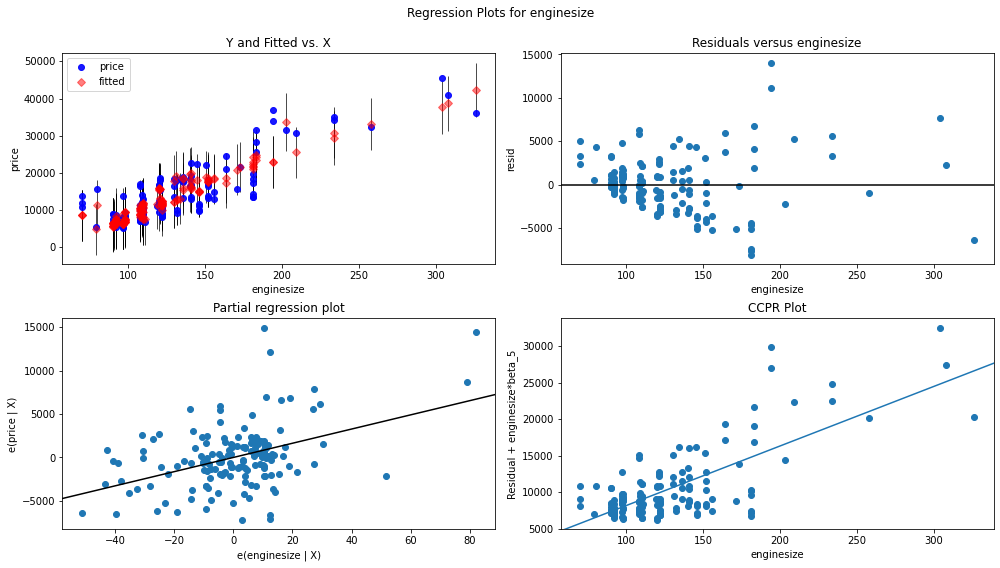

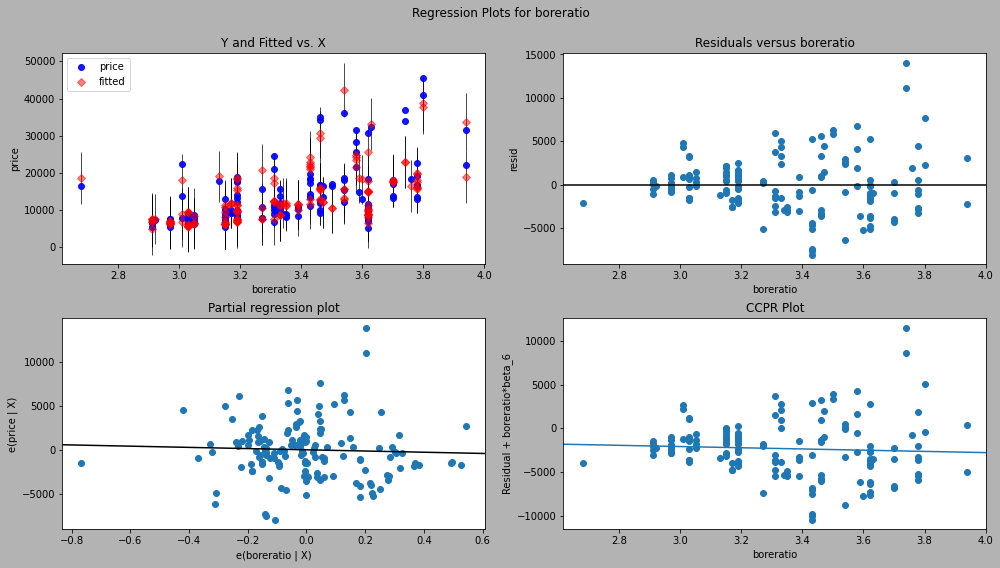

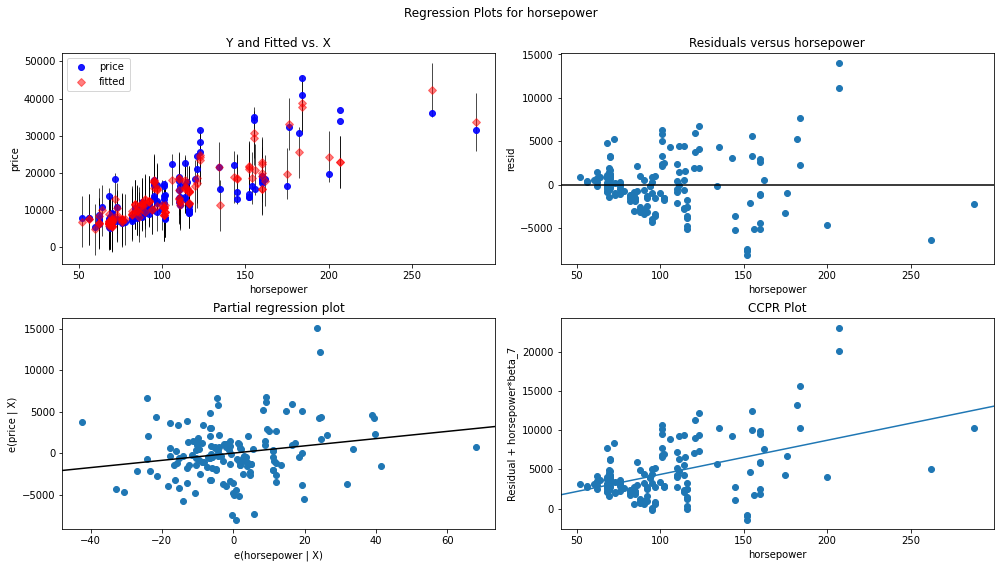

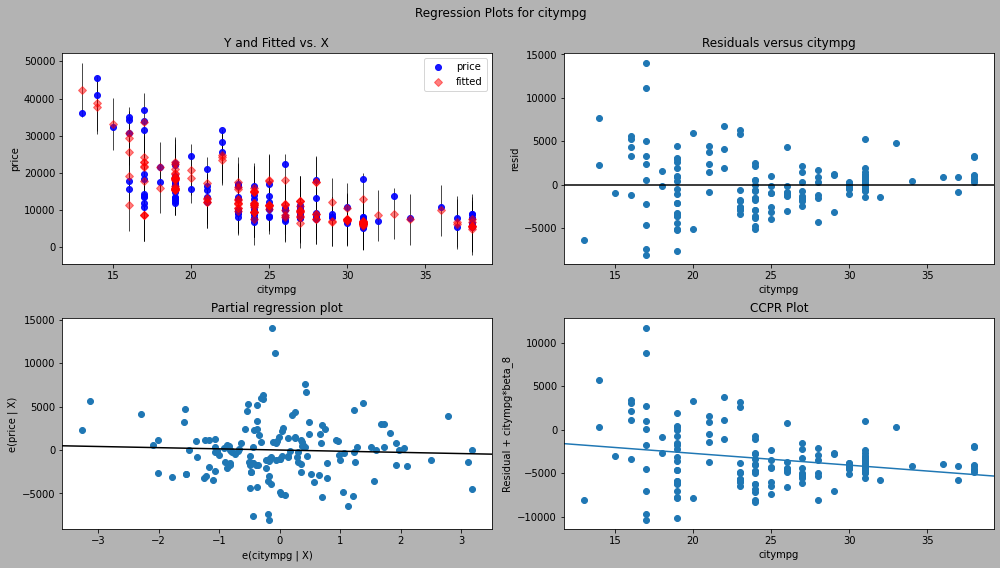

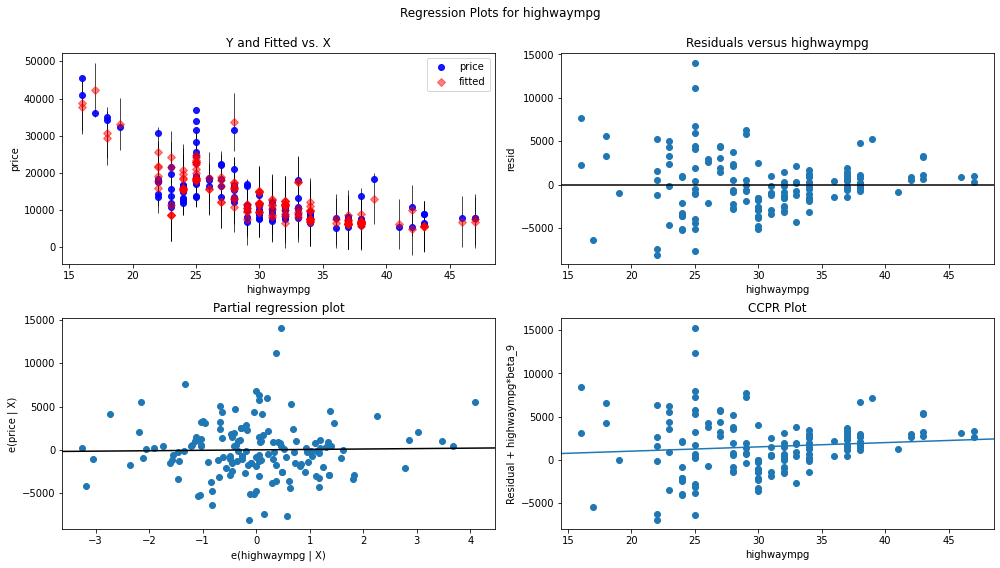

In [17]:
#Set background color
facecolor = '0.7'
for i in range(0,len(MultiVarChoices)):
  #Alternate background color so it's easier to see separate graphs for the different residuals
  if (facecolor == '0.7'):
    facecolor = '1'
  else:
    facecolor = '0.7'
  #Fresh figure so graphs don't all stack together
  fig = None
  # modify figure size
  fig = plt.figure(figsize=(14, 8))
  fig.patch.set_facecolor(facecolor)
  #Creating regression plots
  fig = sm.graphics.plot_regress_exog(multi_model, MultiVarChoices[i],fig=fig)
  fig.show()

# **Conclusions**
Observing our residuals, the points in the scatterplots are randomly distributed around 0, meaning linear regression is an appropriate model to predict our data.